For all the code below, 1 denotes Type A and 2 denotes Type B when plotting the actual "snapshots".

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [176]:
def read_EnNB(infile):

    """
    _summary_

    Returns:
        _type_: returns step, total energy, number of AA bonds, number of BB bonds, number of AB bonds
    """
    
    data = np.loadtxt(infile)
    
    nicer_data = data.T

    step_index = 0
    energy_index = 1
    AA_index = 2
    BB_index = 3
    AB_index = 4

    return nicer_data[step_index], nicer_data[energy_index], nicer_data[AA_index], nicer_data[BB_index], nicer_data[AB_index]

# /Users/mohan/Desktop/UVA/Y5S2/atomistic_sims/hw5/0.05-0.05-0.01/10K/EnNB.out
temperatures = [10, 100, 500, 1000, 1500]

results = []

results_two = []

for t, temp in enumerate(temperatures):
    file = f"0.05-0.05-0.01/{str(temp)}K/EnNB.out"
    step, energy, AA, BB, AB = read_EnNB(file)
    results.append([step, energy, AA, BB, AB])

for t, temp in enumerate(temperatures):
    file = f"0.05-0.05-0.25/{str(temp)}K/EnNB.out"
    step, energy, AA, BB, AB = read_EnNB(file)
    results_two.append([step, energy, AA, BB, AB])

## {A-A: -0.05}, {B-B: -0.05}, {A-B: -0.01}

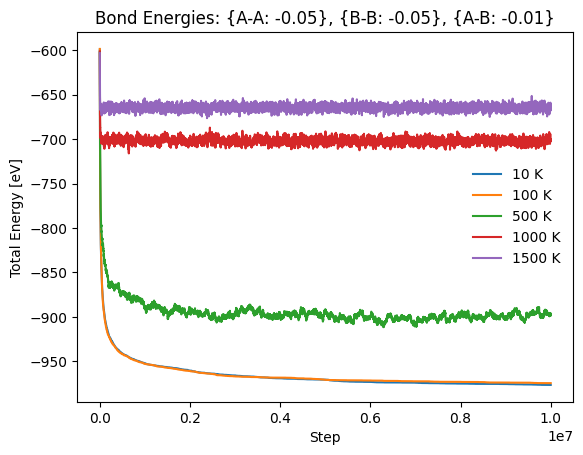

In [177]:
step_index = 0
energy_index = 1
AA_index = 2
BB_index = 3
AB_index = 4

for i, val in enumerate(results):
    plt.plot(val[step_index], val[energy_index], label = f"{temperatures[i]} K")
plt.title("Bond Energies: {A-A: -0.05}, {B-B: -0.05}, {A-B: -0.01}")
plt.xlabel("Step")
plt.ylabel("Total Energy [eV]")
plt.legend(frameon = False)
plt.show();

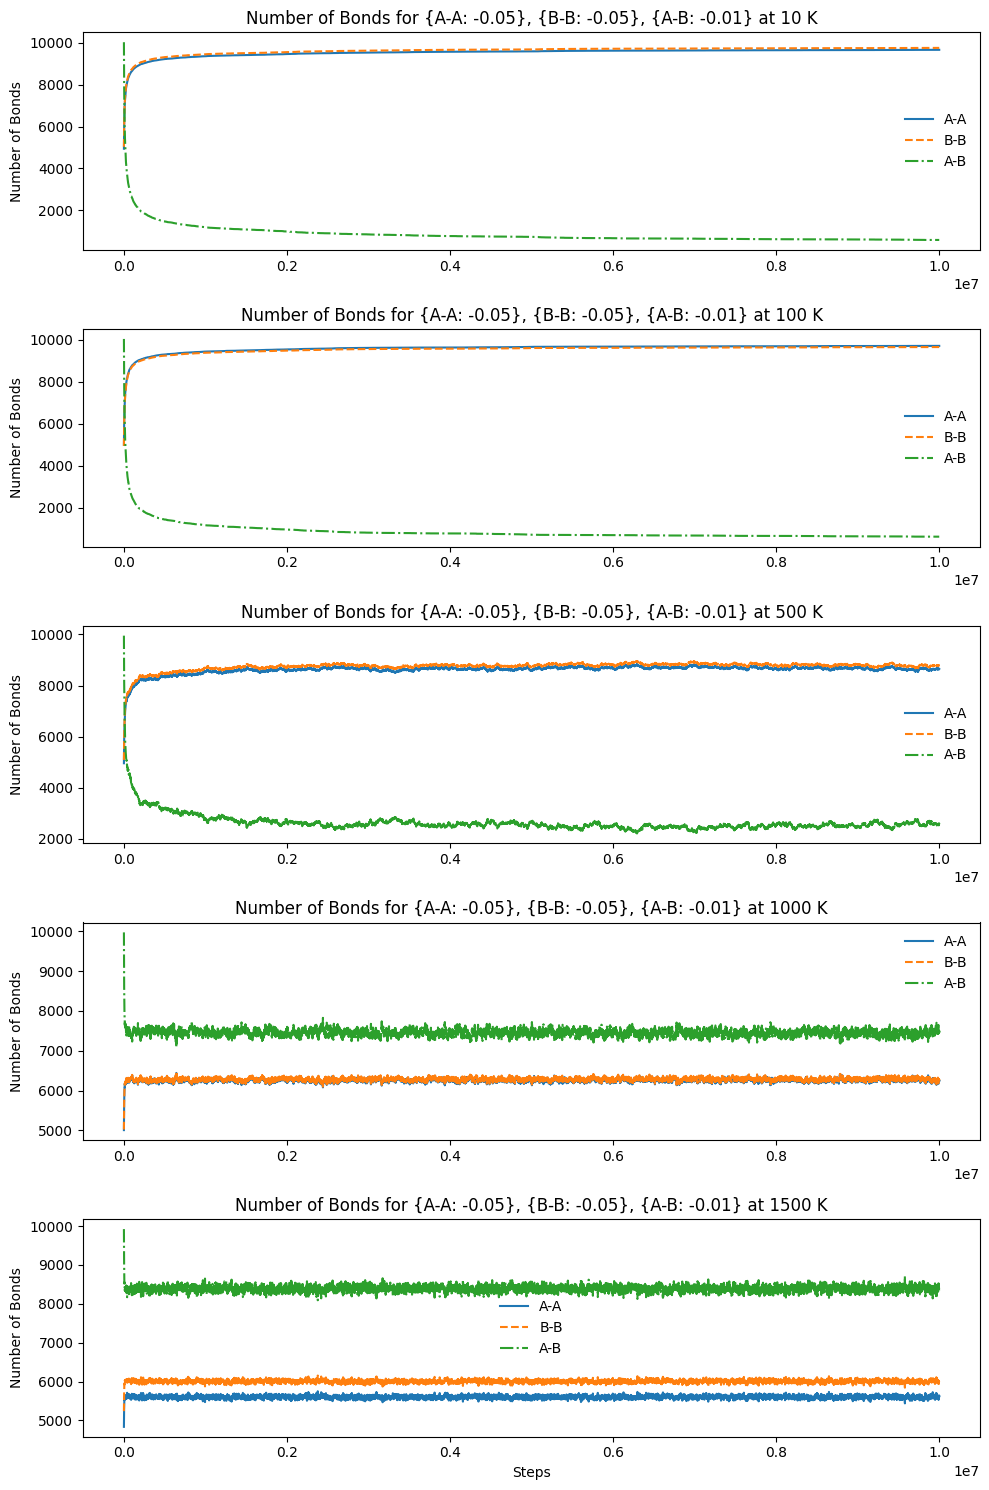

In [178]:
fig, ax = plt.subplots(len(temperatures), figsize = (10, 15))

for i, val in enumerate(results):
    ax[i].plot(val[step_index], val[AA_index], linestyle = '-', label = f"A-A")
    ax[i].plot(val[step_index], val[BB_index], linestyle = '--', label = f"B-B")
    ax[i].plot(val[step_index], val[AB_index], linestyle = 'dashdot', label = f"A-B")
    ax[i].set_title("Number of Bonds for {A-A: -0.05}, {B-B: -0.05}, {A-B: -0.01} at "+str(temperatures[i])+" K")
    ax[i].set_ylabel("Number of Bonds")
    ax[i].legend(frameon = False)

plt.xlabel("Steps")
plt.tight_layout()
plt.show();

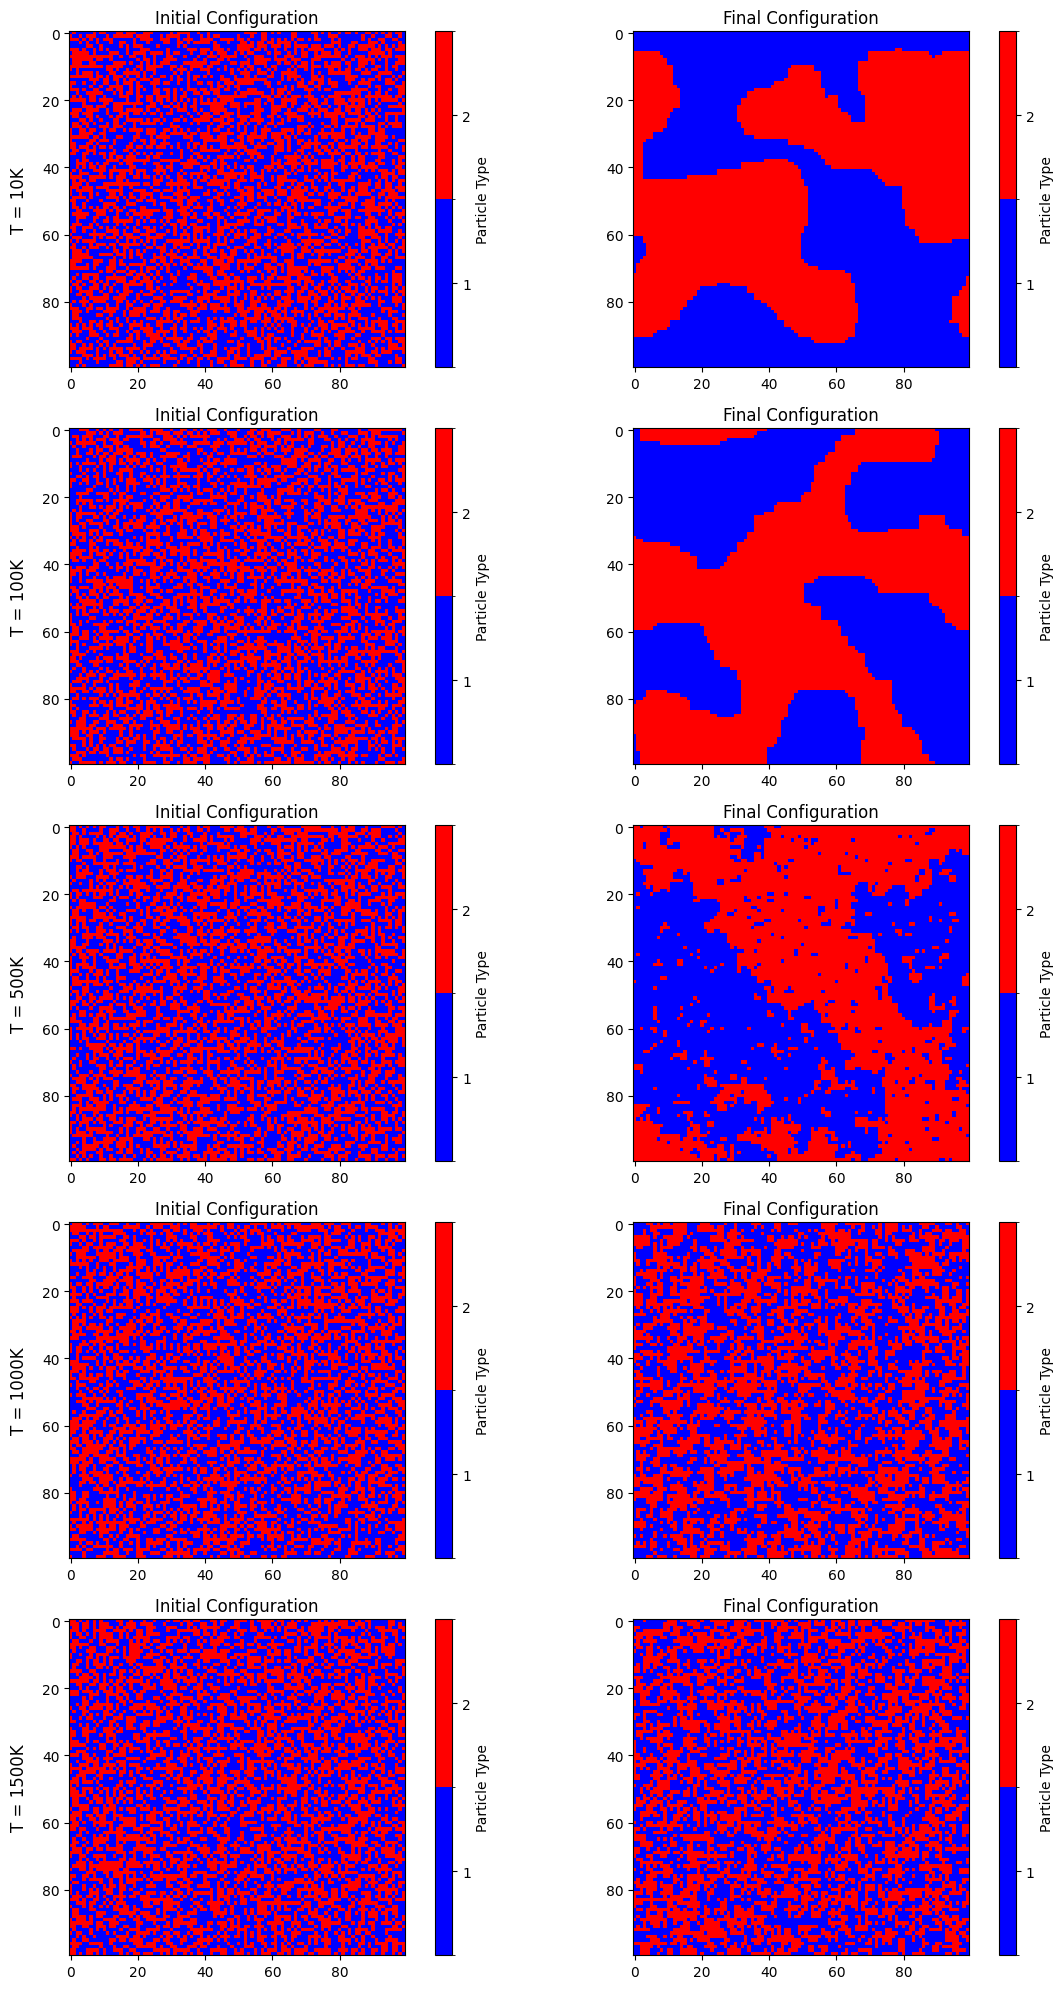

In [179]:
fig, ax = plt.subplots(len(temperatures), 2, figsize=(12, 4 * len(temperatures)))

for t, temp in enumerate(temperatures):
    init_position = f"0.05-0.05-0.01/{str(temp)}K/data/mc000000000.d"
    final_position = f"0.05-0.05-0.01/{str(temp)}K/data/mc010000000.d"

    init_position_data = np.loadtxt(init_position)
    final_position_data = np.loadtxt(final_position)

    # Define a discrete colormap for values 1 and 2
    cmap = mcolors.ListedColormap(["blue", "red"])
    bounds = [0.5, 1.5, 2.5]  # Boundaries for values 1 and 2
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Plot initial configuration
    im0 = ax[t][0].imshow(init_position_data[:, 2].reshape(100, 100), cmap=cmap, norm=norm)
    ax[t][0].set_title("Initial Configuration")

    # Add colorbar to the first subplot
    cbar0 = fig.colorbar(im0, ax=ax[t][0], ticks=[1, 2])
    cbar0.set_label("Particle Type")

    # Plot final configuration
    im1 = ax[t][1].imshow(final_position_data[:, 2].reshape(100, 100), cmap=cmap, norm=norm)
    ax[t][1].set_title("Final Configuration")

    # Add colorbar to the second subplot
    cbar1 = fig.colorbar(im1, ax=ax[t][1], ticks=[1, 2])
    cbar1.set_label("Particle Type")

    ax[t, 0].set_ylabel(f"T = {temp}K", fontsize=12, rotation=90, labelpad=10)


plt.tight_layout()
plt.show()


### Discussion of {A-A: -0.05}, {B-B: -0.05}, {A-B: -0.01} Results:

These results follow the trend described by $E_{AB} > \frac{E_{AA} + E_{BB}}{2}$, and the system consequently minimizes energy (i.e. $\Delta H_{mix}$ ) by minimizing the number of A-B bonds evident in the plots and lattices above. At higher temperatures, there is enough thermal energy in the system that entropic effects are strong, leading to disorder (lack of clustering regions).

## {A-A: -0.05}, {B-B: -0.05}, {A-B: -0.25}

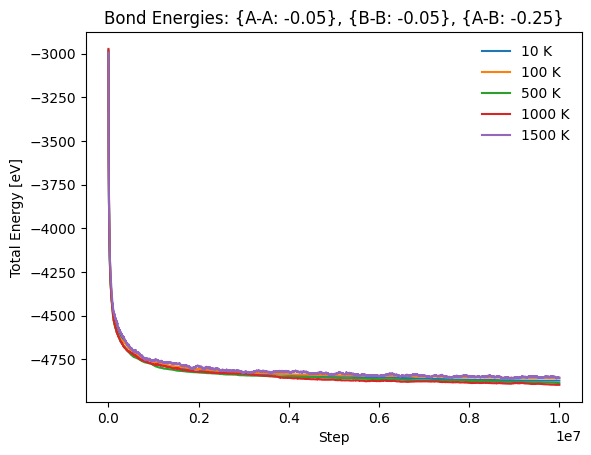

In [180]:
for i, val in enumerate(results_two):
    plt.plot(val[step_index], val[energy_index], label = f"{temperatures[i]} K")
plt.title("Bond Energies: {A-A: -0.05}, {B-B: -0.05}, {A-B: -0.25}")
plt.xlabel("Step")
plt.ylabel("Total Energy [eV]")
plt.legend(frameon = False)
plt.show();

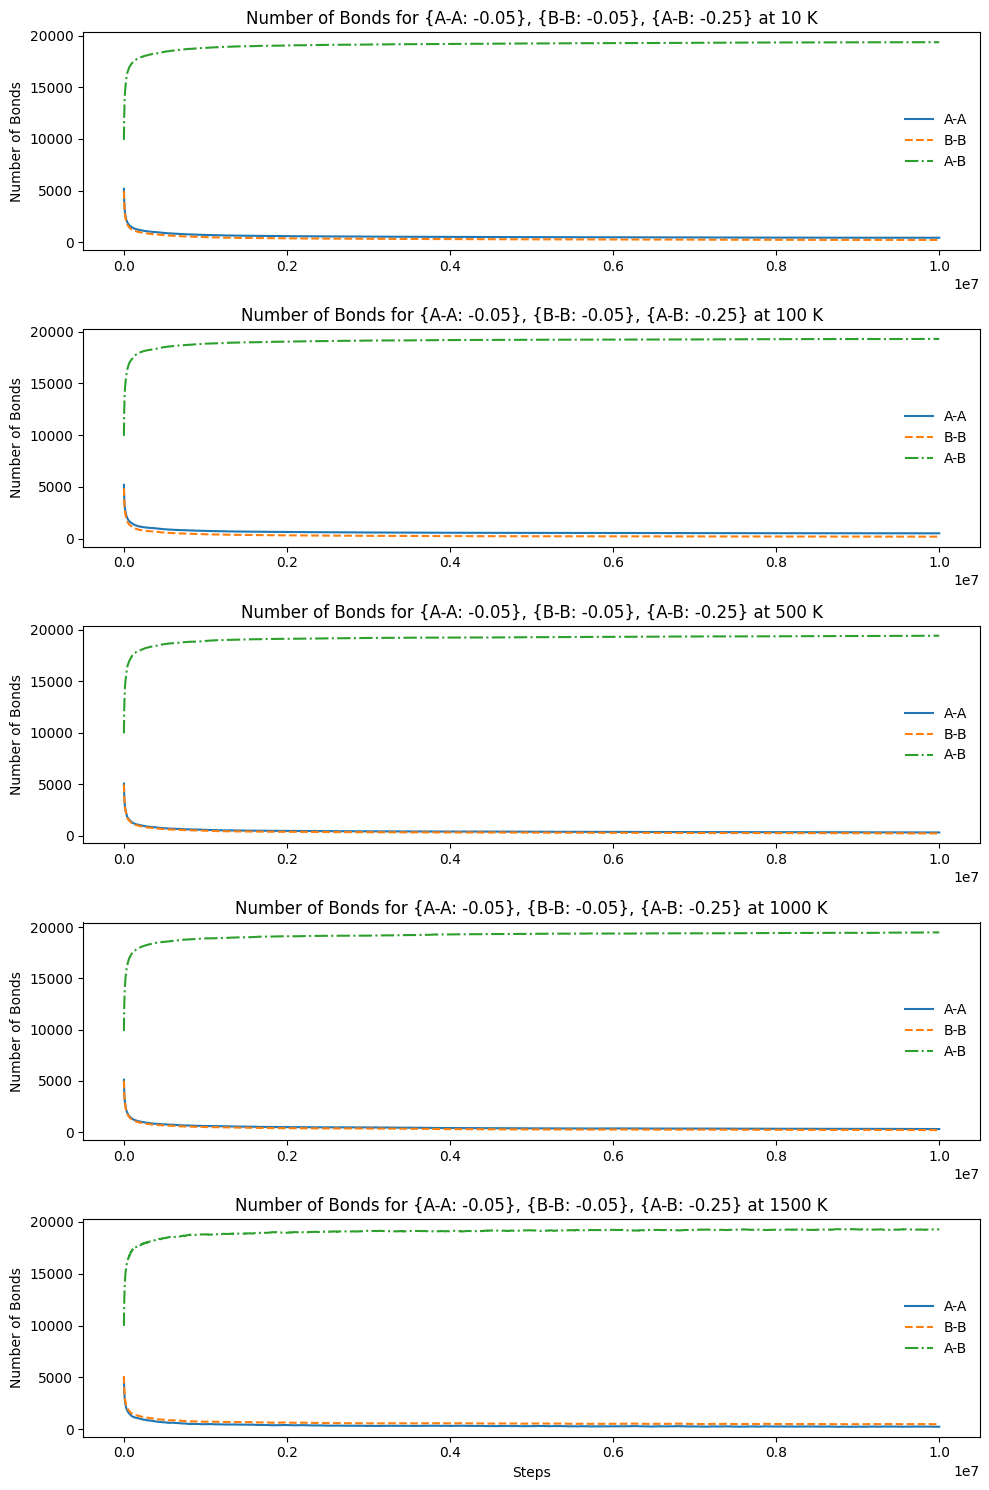

In [181]:
fig, ax = plt.subplots(len(temperatures), figsize = (10, 15))

for i, val in enumerate(results_two):
    ax[i].plot(val[step_index], val[AA_index], linestyle = '-', label = f"A-A")
    ax[i].plot(val[step_index], val[BB_index], linestyle = '--', label = f"B-B")
    ax[i].plot(val[step_index], val[AB_index], linestyle = 'dashdot', label = f"A-B")
    ax[i].set_title("Number of Bonds for {A-A: -0.05}, {B-B: -0.05}, {A-B: -0.25} at "+str(temperatures[i])+" K")
    ax[i].set_ylabel("Number of Bonds")
    ax[i].legend(frameon = False)

plt.xlabel("Steps")
plt.tight_layout()
plt.show();

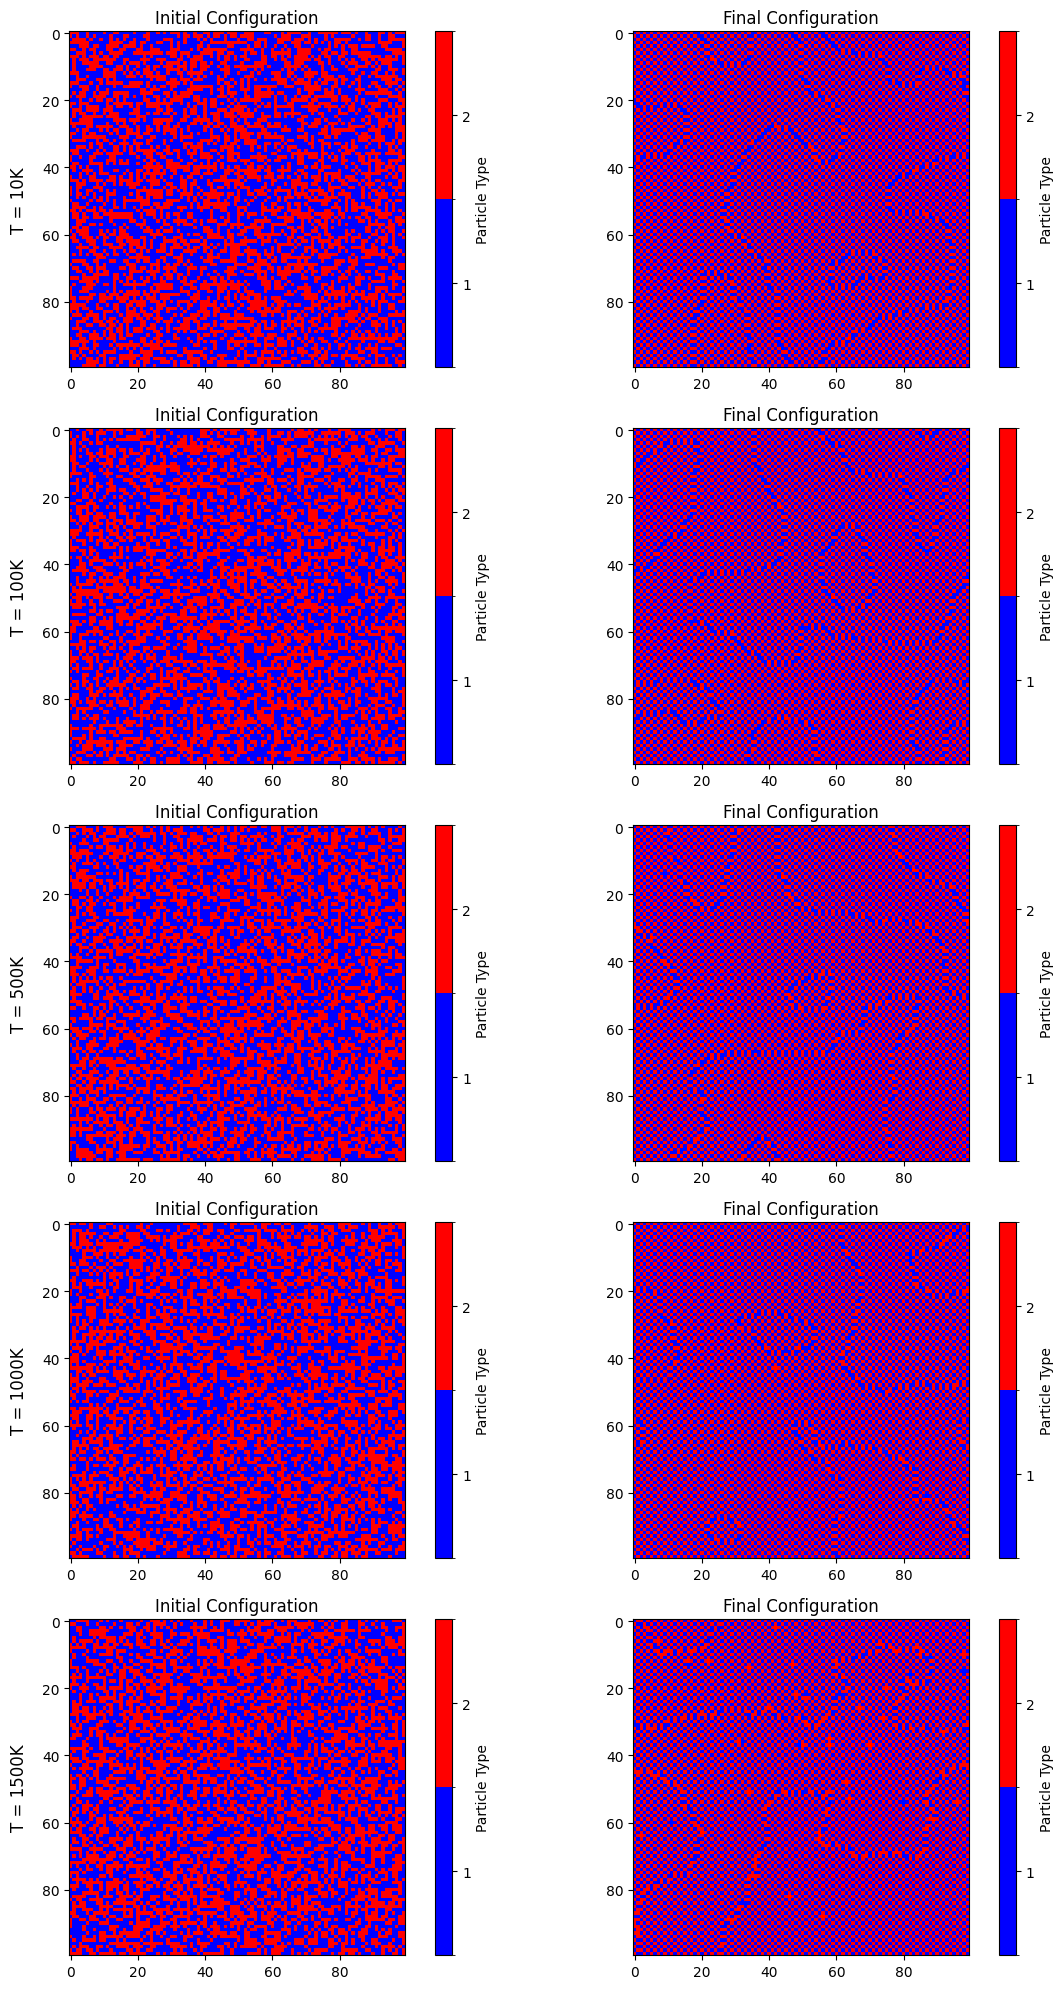

In [182]:
fig, ax = plt.subplots(len(temperatures), 2, figsize=(12, 4 * len(temperatures)))

for t, temp in enumerate(temperatures):
    init_position = f"0.05-0.05-0.25/{str(temp)}K/data/mc000000000.d"
    final_position = f"0.05-0.05-0.25/{str(temp)}K/data/mc010000000.d"

    init_position_data = np.loadtxt(init_position)
    final_position_data = np.loadtxt(final_position)

    # Define a discrete colormap for values 1 and 2
    cmap = mcolors.ListedColormap(["blue", "red"])
    bounds = [0.5, 1.5, 2.5]  # Boundaries for values 1 and 2
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Plot initial configuration
    im0 = ax[t][0].imshow(init_position_data[:, 2].reshape(100, 100), cmap=cmap, norm=norm)
    ax[t][0].set_title("Initial Configuration")

    # Add colorbar to the first subplot
    cbar0 = fig.colorbar(im0, ax=ax[t][0], ticks=[1, 2])
    cbar0.set_label("Particle Type")

    # Plot final configuration
    im1 = ax[t][1].imshow(final_position_data[:, 2].reshape(100, 100), cmap=cmap, norm=norm)
    ax[t][1].set_title("Final Configuration")

    # Add colorbar to the second subplot
    cbar1 = fig.colorbar(im1, ax=ax[t][1], ticks=[1, 2])
    cbar1.set_label("Particle Type")

    ax[t, 0].set_ylabel(f"T = {temp}K", fontsize=12, rotation=90, labelpad=10)


plt.tight_layout()
plt.show()


### Discussion of {A-A: -0.05}, {B-B: -0.05}, {A-B: -0.25} Results:

These results follow the trend described by $E_{AB} <> \frac{E_{AA} + E_{BB}}{2}$, and the system consequently minimizes energy (i.e. $\Delta H_{mix}$ ) by maximizing the number of A-B bonds evident in the plots and lattices above. Even at higher temperatures, the energy associated with forming A-B bonds is so negative that the phenomenon is still favorable and leads to an ordered system.

# Question 4: Forming Vacancies

To be lazy, I altered the code to perform "flips" instead of sways, and I let {A-A: -0.25}, {B-B: 0.00}, {A-B: 0.00} to account for the 1 eV penalty of forming a vacancy. To determine suitable temperatures to form vacancies, I rearranged

$$ n_{eq} = N \exp \left[ - \frac{\varepsilon_v^f}{k_B T} \right] $$

$$ \ln \left( \frac{n_{eq}}{N} \right) =  - \frac{\varepsilon_v^f}{k_B T} $$

$$ T = - \frac{\varepsilon_f^f}{k_B \ln \left( \frac{n_{eq}}{N} \right)}$$
to determine the temperature required to get $x \%$ of vacancies (i.e. $n_{eq} / N$) formed.

e.g. If we want 25% vacancy formation, $n_{eq} / N = 0.25$ and $\varepsilon_v^f$ is 1 eV. Using $k_B = 8.617 \times 10^{-5} $ eV/K we find that T $\approx$ 8371 K

In [183]:
def find_temp(percentage, energy_vac_form):
    """
    Args:
        percentage (_type_): n_eq / N
        energy_vac_form (_type_): Energy for forming the vacancy in eV

    Returns:
        _type_: Temperature [K] 
    """
    kb = 8.6173303e-5
    return - energy_vac_form / (kb * np.log(percentage))

def find_vacancies(lattice):
    """
    Find elements (i.e indices) in array == 2 and return that array of indices

    Args:
        lattice (_type_): Initial/final configuration of lattice

    Returns:
        _type_: _description_
    """
    vacancies = np.where(lattice == 2)
    return vacancies[0] # not sure why you have to take the first element, but that's what the array containing all indices 


percentages = [0.01, 0.1, 0.25, 0.5, 0.75]

vacancy_temp = [temp for temp in find_temp(percentages, 1)]

print(vacancy_temp) # temperatures to get n_eq/N as defined in the `percentages` list

[2519.8899588614577, 5039.779917722915, 8370.893250366436, 16741.786500732873, 40338.00928789056]


Percent Error of Final Vacancy Concentration from Theory: 6.00
Percent Error of Final Vacancy Concentration from Theory: 27.90
Percent Error of Final Vacancy Concentration from Theory: 9.04
Percent Error of Final Vacancy Concentration from Theory: 19.64
Percent Error of Final Vacancy Concentration from Theory: 38.77


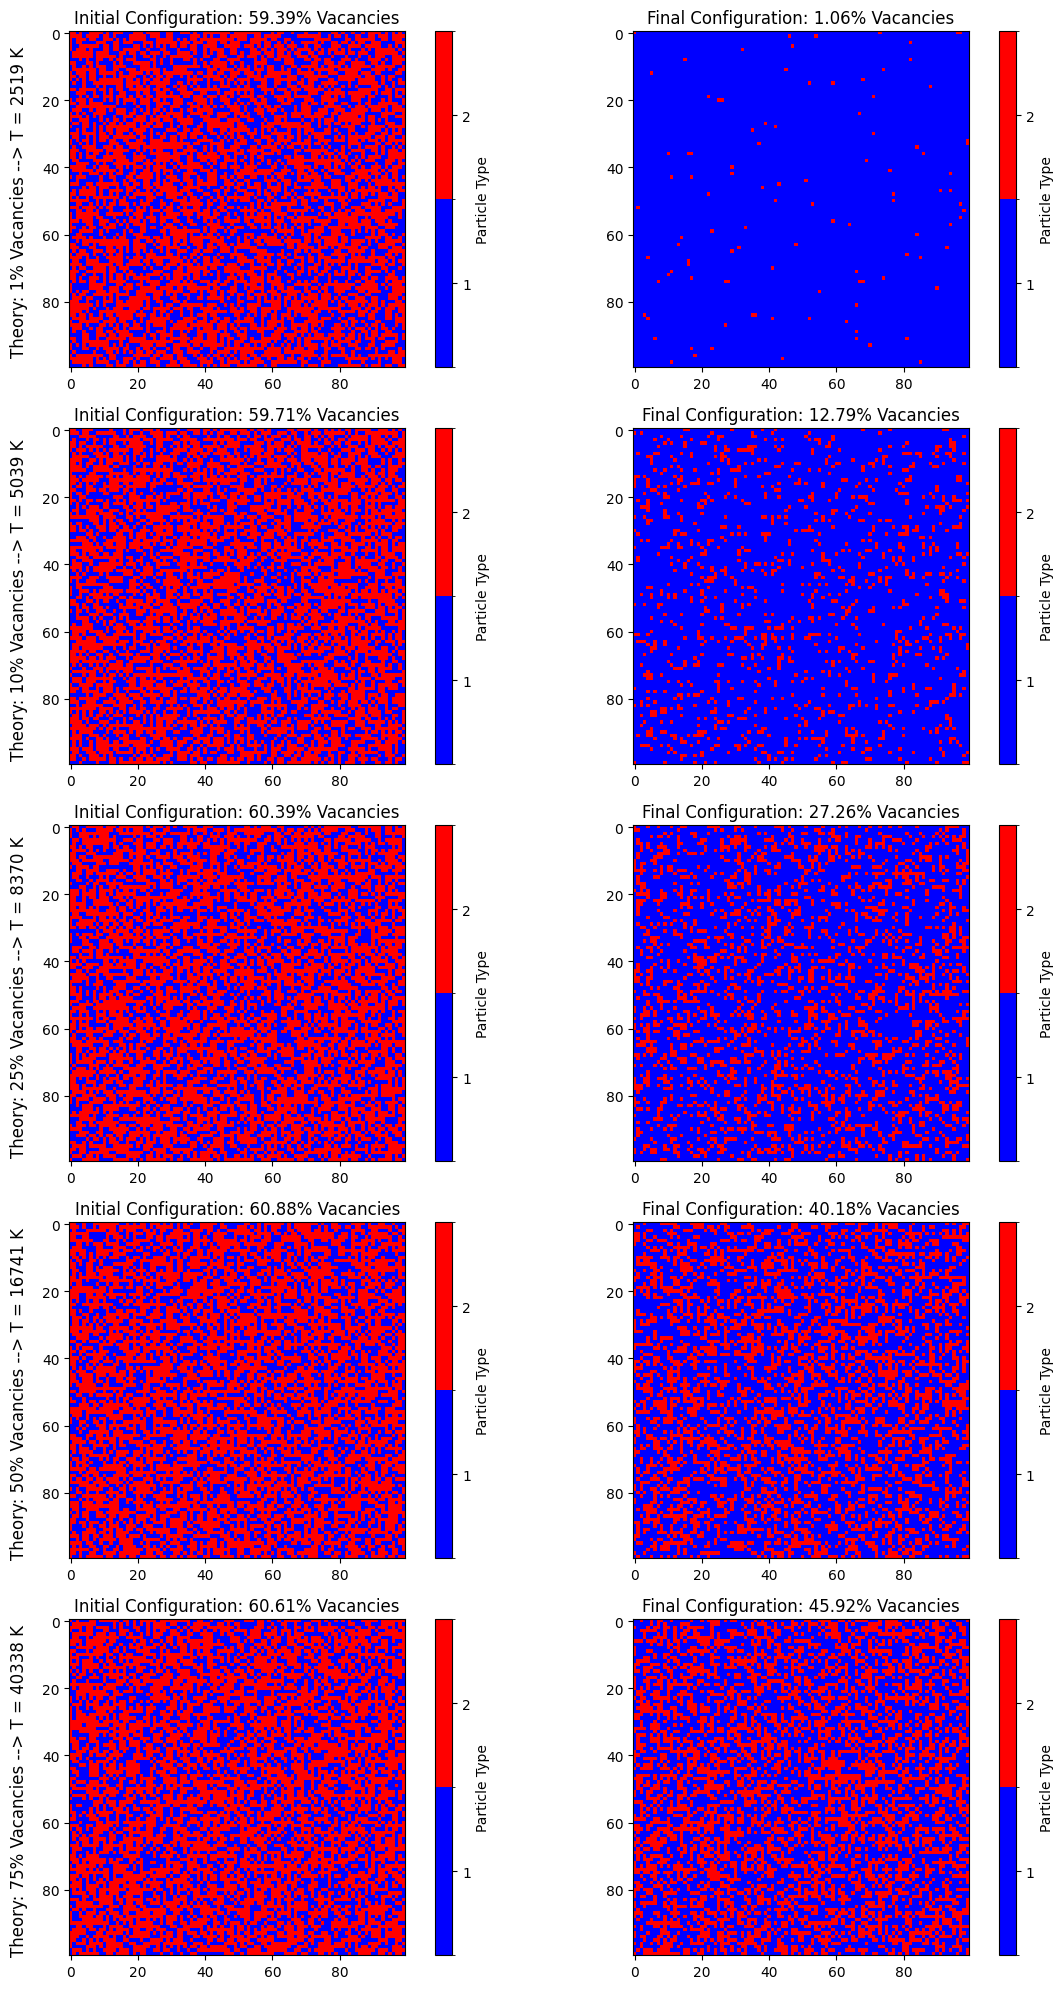

In [184]:
vacancy_paths = ["1_vac", "10_vac", "25_vac", "50_vac", "75_vac"]

fig, ax = plt.subplots(len(temperatures), 2, figsize=(12, 4 * len(temperatures)))

for t, path in enumerate(vacancy_paths):
    init_position = f"{path}/data/mc000000000.d"
    final_position = f"{path}/data/mc010000000.d"

    init_position_data = np.loadtxt(init_position)
    final_position_data = np.loadtxt(final_position)

    # Define a discrete colormap for values 1 and 2
    cmap = mcolors.ListedColormap(["blue", "red"])
    bounds = [0.5, 1.5, 2.5]  # Boundaries for values 1 and 2
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    init_vac = find_vacancies(init_position_data[:, 2])

    init_vac_percent = len(init_vac)/(100**2)

    final_vac = find_vacancies(final_position_data[:, 2])

    final_vac_percent = len(final_vac)/(100**2)

    # Plot initial configuration
    im0 = ax[t][0].imshow(init_position_data[:, 2].reshape(100, 100), cmap=cmap, norm=norm)
    ax[t][0].set_title(f"Initial Configuration: {init_vac_percent*100:.2f}% Vacancies")

    # Add colorbar to the first subplot
    cbar0 = fig.colorbar(im0, ax=ax[t][0], ticks=[1, 2])
    cbar0.set_label("Particle Type")

    # Plot final configuration
    im1 = ax[t][1].imshow(final_position_data[:, 2].reshape(100, 100), cmap=cmap, norm=norm)
    ax[t][1].set_title(f"Final Configuration: {final_vac_percent*100:.2f}% Vacancies")

    # Add colorbar to the second subplot
    cbar1 = fig.colorbar(im1, ax=ax[t][1], ticks=[1, 2])
    cbar1.set_label("Particle Type")

    ax[t, 0].set_ylabel(f"Theory: {percentages[t] * 100 :.0f}% Vacancies --> T = {int(vacancy_temp[t])} K ", fontsize=12, rotation=90, labelpad=10)

    print(f"Percent Error of Final Vacancy Concentration from Theory: {np.abs((percentages[t] - final_vac_percent)/percentages[t])*100:.2f}")


plt.tight_layout()
plt.show()


At lower vacancy percetages, the approximation 

$$ -k_B \left( \frac{n}{N - n} \right) \approx \left( \frac{n}{N} \right) $$

is more appropriate as N >> n holds true. At larger vacancy percentages (i.e. as n/N increases), this is an increasingly poor approximation as N >> n is less accurate. Consequently, we see a larger deviation in equilibrium vacancy formation at larger vacancy percentages. This could be further explored by increasing the size of the lattice (N) and seeing how the results change.